<a href="https://colab.research.google.com/github/harishahamed26/Car-pole-V0-Reinforcement-Learning/blob/main/PredictionChallenge3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skeleton Code for Prediction Challenge 3
Below is partial code to get you started on prediction challenge 3. You need to select values for the parameters that have question marks.

In [1]:
!pip install keras-rl2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 2.8 MB/s eta 0:00:00


In [2]:
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:

# load the gym module
import gym
import matplotlib.pyplot as plt
# import the usual Keras modules for creating deep neural networks
from keras import Sequential
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam
import numpy as np
import random

ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME)
env.seed(100)
np.random.seed(100)
random.seed(100)

import rl
from rl.memory import SequentialMemory  # import the exerience replay buffer module
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy # import the policy
from rl.agents.dqn import DQNAgent   


In [34]:
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model.add(Flatten())
# add extra layers here

model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))





model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 4)                 0         
                                                                 
 dense_15 (Dense)            (None, 16)                80        
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 flatten_5 (Flatten)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 64)                2112      
                                                                 
 dense_18 (Dense)            (None, 2)                 130       
                                                                 
Total params: 2,866
Trainable params: 2,866
Non-traina

Training for 5000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   13/5000: episode: 1, duration: 1.580s, episode steps:  13, steps per second:   8, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.615 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   29/5000: episode: 2, duration: 0.014s, episode steps:  16, steps per second: 1131, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.625 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   44/5000: episode: 3, duration: 0.013s, episode steps:  15, steps per second: 1120, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.600 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   71/5000: episode: 4, duration: 0.024s, episode steps:  27, steps per second: 1105, episode reward: 27.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.593 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   99/5000: episode: 5, duration: 0.023s, episode steps:  28, steps per second: 1221, epi

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  145/5000: episode: 6, duration: 4.804s, episode steps:  46, steps per second:  10, episode reward: 46.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.543 [0.000, 1.000],  loss: 0.371021, mae: 3.784822, mean_q: 7.090707, mean_eps: 0.977950
  204/5000: episode: 7, duration: 0.524s, episode steps:  59, steps per second: 113, episode reward: 59.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.525 [0.000, 1.000],  loss: 0.192075, mae: 3.814668, mean_q: 7.475561, mean_eps: 0.968680
  219/5000: episode: 8, duration: 0.147s, episode steps:  15, steps per second: 102, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.533 [0.000, 1.000],  loss: 0.229321, mae: 3.823148, mean_q: 7.498329, mean_eps: 0.962020
  247/5000: episode: 9, duration: 0.282s, episode steps:  28, steps per second:  99, episode reward: 28.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 0.199853, mae: 3.799333, mean_q: 7.495347, mean_eps: 0.958

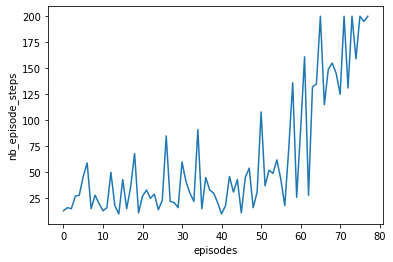

In [42]:
from numpy.random import gamma
memory = SequentialMemory(limit=2500 ,window_length=1)

LearnRate = 0.00015
steps = 5000

policy =  LinearAnnealedPolicy(inner_policy= EpsGreedyQPolicy(eps=.1), 
                               attr='eps',            
                               value_max=1.,
                               value_min=.1, 
                               value_test=.05,
                               nb_steps=steps)

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=100,
               target_model_update=LearnRate, 
               policy=policy , gamma=1,) 

dqn.compile(Adam(learning_rate = LearnRate), metrics=['mae'])

history = dqn.fit(env, nb_steps=steps, visualize=False, verbose=2)


# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()



In [43]:
# Testing
dqn.test(env, nb_episodes=20, visualize=False)

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 185.000, steps: 185
Episode 3: reward: 194.000, steps: 194
Episode 4: reward: 198.000, steps: 198
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 197.000, steps: 197
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 192.000, steps: 192
Episode 20: reward: 200.000, steps: 200
